# **Metacritic - Análisis de Reseñas de Videojuegos Históricos**

**Integrantes:**

- Sergio Renato Zegarra Villanueva (a20190028)
- Máximo Alejandro Guzmán Huamán (f1446907)

**Definición del Problema**

La percepción de los videojuegos varía significativamente entre los críticos y los jugadores. Mientras que Metacritic proporciona una puntuación promedio basada en reseñas de críticos especializados, las opiniones de los usuarios reflejan una experiencia subjetiva más cercana a la comunidad. En muchos casos, las diferencias entre ambas evaluaciones pueden ser sustanciales y responder a diversos factores, como expectativas, actualizaciones del juego, errores técnicos o elementos de jugabilidad.

Este proyecto busca responder a la siguiente pregunta clave: **¿Existe una correlación entre la puntuación de los videojuegos en Metacritic y el sentimiento expresado en las reseñas de los jugadores?** En caso de discrepancias, se analizarán las posibles causas que explican por qué ciertos juegos pueden ser bien evaluados por la crítica pero mal recibidos por los jugadores (o viceversa).

**Objetivos del Proyecto**

a. Extracción de Datos: Desarrollar un scraper automatizado para recopilar información clave de los videojuegos y sus reseñas en Metacritic.

b. Análisis de Sentimiento: Aplicar técnicas de procesamiento de lenguaje natural (NLP) para determinar el sentimiento predominante en las reseñas de los jugadores.

c. Comparación con Puntuaciones Críticas: Evaluar la relación entre la puntuación de Metacritic y el sentimiento expresado en las reseñas.

d. Identificación de Patrones: Clasificar los videojuegos según el grado de coincidencia o discrepancia entre la puntuación de críticos y el sentimiento de los jugadores.

e. Visualización de Resultados: Presentar análisis gráficos sobre la relación entre las calificaciones de los juegos y la percepción del público.

f. Generación de Insights: Determinar las posibles razones detrás de las discrepancias encontradas y ofrecer conclusiones sobre la percepción de los videojuegos.

**Descripción del Proyecto**

Este proyecto tiene como objetivo recopilar y analizar las reseñas de los mejores videojuegos de todos los tiempos utilizando la plataforma Metacritic (https://www.metacritic.com/). Para lograrlo, se desarrolló un scraper automatizado con Selenium y BeautifulSoup, permitiendo la extracción estructurada de datos clave de los videojuegos y sus respectivas reseñas de usuarios.

El proceso consta de dos fases principales:

**1. Extracción de Datos de los Mejores Videojuegos:** Se recolectaron información relevante de los juegos en las primeras 50 páginas del sitio web, con un total de 1,200 juegos registrados (24 juegos por página). Para cada juego, se extrajeron los siguientes atributos:

- Nombre del juego
- Fecha de lanzamiento
- Calificación de los usuarios
- Descripción
- Metascore (puntaje de críticos)
- Enlace directo a la página del juego en Metacritic


**2. Extracción de Reseñas de Usuarios:** A partir de los enlaces recopilados en la primera fase, se ingresó a cada juego para obtener hasta 1,000 reseñas por título. Debido a que no todos los juegos cuentan con una gran cantidad de reseñas, la cantidad final de datos recopilados fue de 188,720 reseñas.

**Detalles Técnicos**
- **Automatización con Selenium:** Se configuró un WebDriver para navegar en el sitio, interactuar con la página y esperar la carga dinámica de los elementos.
- **Extracción con BeautifulSoup:** Se utilizó esta librería para analizar el HTML y extraer la información requerida.
- **Manejo de Paginación:** Se recorrieron 50 páginas de Metacritic para obtener el listado de juegos.
- **Extracción de Datos con Robustez:** Se implementaron esperas explícitas para garantizar la carga de elementos y evitar bloqueos en la navegación.
- **Almacenamiento Eficiente:** Los datos se guardaron en archivos CSV dividiendo la información en partes de máximo 20MB, optimizando el rendimiento en el manejo de grandes volúmenes de datos.

**Repositorio del Proyecto**

El código fuente del scraper y los datos recopilados están disponibles en el siguiente repositorio de GitHub: Metacritic Game Scraper (https://github.com/MaximoGuzmanH/metacritic-game-scraper.git).

Este proyecto proporciona una base de datos extensa para el análisis de la percepción de los videojuegos a lo largo de la historia y la correlación entre las puntuaciones de críticos y usuarios.

---

## **1. Scraper para Obtener los Mejores Juegos y sus Reseñas** ##

El proceso de scraping consta de los siguientes pasos:

a. Configuración del WebDriver: Se establece un WebDriver de Selenium con opciones para mejorar el rendimiento y evitar restricciones de acceso.

b. Extracción de Videojuegos:
- Se recorren 50 páginas del sitio Metacritic.
- Se identifican los juegos y se extrae su información clave.
- Se almacenan los datos en un archivo CSV, segmentando los archivos para no superar los 20MB.

c. Extracción de Reseñas de Usuarios:
- Se accede a cada juego individualmente a través de su enlace.
- Se recogen hasta 1,000 reseñas por juego, extrayendo usuario, puntaje, fecha y contenido de la reseña.
- Se almacena la información en CSV de manera eficiente.

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup
import time
import os
import pandas as pd

# Configuración inicial del driver
def setup_driver():
    """
    Configura el WebDriver de Selenium con opciones específicas para mejorar el rendimiento y evitar problemas.
    """
    options = webdriver.ChromeOptions()
    options.add_argument("--disable-gpu")
    options.add_argument("--no-sandbox")
    options.add_argument("--start-maximized")
    driver_path = r"C:\\Users\\Maximo Guzman\\Desktop\\Metacritic - Scraper\\chromedriver.exe"
    driver = webdriver.Chrome(service=webdriver.chrome.service.Service(driver_path), options=options)
    return driver

# Función para dividir y guardar la data en archivos CSV de máximo 20MB
def save_to_csv(filename, data):
    """
    Guarda los datos en archivos CSV de máximo 20 MB cada uno.
    """
    max_size = 20 * 1024 * 1024  # 20MB en bytes
    file_count = 1
    chunk_size = 10000  # Cantidad de filas por bloque (ajustable)
    
    df = pd.DataFrame(data)

    while True:
        file_path = f"{filename}_{file_count}.csv"
        df_chunk = df.iloc[(file_count - 1) * chunk_size : file_count * chunk_size]

        if df_chunk.empty:
            break

        df_chunk.to_csv(file_path, index=False, encoding="utf-8")

        # Si el archivo supera los 20MB, reducimos el chunk size para los siguientes archivos
        if os.path.getsize(file_path) > max_size:
            chunk_size = int(chunk_size * 0.8)

        file_count += 1

    print(f"Datos guardados en {file_count - 1} archivo(s) '{filename}_*.csv'.")

# Función principal para realizar el scraping de Metacritic
def scrape_metacritic():
    start_time = time.time()
    driver = setup_driver()
    base_url = "https://www.metacritic.com/browse/game/?releaseYearMin=1958&releaseYearMax=2025&page={}"

    all_data = []  # Lista para almacenar la información de los juegos

    # Iterar a través de 50 páginas del sitio web
    for page in range(1, 51):
        url = base_url.format(page)
        print(f"Procesando: {url}")
        driver.get(url)

        WebDriverWait(driver, 20).until(
            EC.presence_of_element_located((By.CLASS_NAME, "c-productListings"))
        )

        soup = BeautifulSoup(driver.page_source, "html.parser")
        section_id = f"detailed|{page}"
        main_div = soup.find("div", {"section": section_id, "class": "c-productListings"})

        if not main_div:
            print(f"No se encontró el div especificado en la página {page}.")
            continue

        game_cards = main_div.find_all("div", class_="c-finderProductCard")
        for card in game_cards:
            try:
                title = card.find("div", class_="c-finderProductCard_title")
                title = title.get_text(strip=True) if title else "N/A"

                release_date = card.find("span", class_="u-text-uppercase")
                release_date = release_date.get_text(strip=True) if release_date else "N/A"

                rating = card.find("span", class_="u-text-capitalize")
                rating = rating.find_next_sibling(string=True).strip() if rating else "N/A"

                description = card.find("div", class_="c-finderProductCard_description")
                description = description.get_text(strip=True) if description else "N/A"

                metascore = card.find("div", class_="c-siteReviewScore")
                metascore = metascore.get_text(strip=True) if metascore else "N/A"

                link = card.find("a", href=True)
                link = f"https://www.metacritic.com{link['href']}" if link else "N/A"

                all_data.append({
                    "Title": title,
                    "Release Date": release_date,
                    "Rating": rating,
                    "Description": description,
                    "Metascore": metascore,
                    "Link": link
                })
            except AttributeError as e:
                print(f"Error al procesar una tarjeta de juego: {e}")

    # Guardar la lista de juegos en archivos CSV
    if all_data:
        save_to_csv("metacritic_detailed_games_all_time", all_data)
    else:
        print("No se encontraron datos para guardar.")

    # Scraping de reseñas
    scrape_reviews(all_data, driver)

    driver.quit()
    print(f"Tiempo total de ejecución: {time.time() - start_time:.2f} segundos.")

# Función para extraer reseñas de los juegos
def scrape_reviews(games_data, driver):
    reviews_data = []

    for game in games_data:
        link = game.get("Link")
        if link == "N/A":
            continue

        print(f"Extrayendo reseñas de: {link}")
        driver.get(link)

        try:
            user_reviews_tab = WebDriverWait(driver, 15).until(
                EC.element_to_be_clickable((By.LINK_TEXT, "User Reviews"))
            )
            user_reviews_tab.click()
            WebDriverWait(driver, 15).until(
                EC.presence_of_element_located((By.CLASS_NAME, "c-siteReview_main"))
            )
        except Exception as e:
            print(f"No se pudo acceder a las reseñas para {game['Title']}: {e}")
            continue

        try:
            scroll_pause_time = 2
            last_height = driver.execute_script("return document.body.scrollHeight")

            while True:
                driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
                time.sleep(scroll_pause_time)

                new_height = driver.execute_script("return document.body.scrollHeight")
                if new_height == last_height:
                    break
                last_height = new_height

            soup = BeautifulSoup(driver.page_source, "html.parser")
            reviews = soup.find_all("div", class_="c-siteReview_main")

            if not reviews:
                print(f"No se encontraron reseñas para el juego '{game['Title']}'.")
                continue

            for review in reviews[:1000]:
                try:
                    user = review.find("a", class_="c-siteReviewHeader_username")
                    user = user.get_text(strip=True) if user else "Anonymous"

                    score = review.find("div", class_="c-siteReviewScore")
                    score = score.get_text(strip=True) if score else "N/A"

                    date = review.find("div", class_="c-siteReviewHeader_reviewDate")
                    date = date.get_text(strip=True) if date else "N/A"

                    content = review.find("div", class_="c-siteReview_quote")
                    content = content.get_text(strip=True) if content else "N/A"

                    reviews_data.append({
                        "Game": game["Title"],
                        "User": user,
                        "Score": score,
                        "Date": date,
                        "Content": content,
                        "Link": link
                    })
                except AttributeError as e:
                    print(f"Error al procesar una reseña: {e}")

        except Exception as e:
            print(f"Error al cargar reseñas para {game['Title']}: {e}")

    # Guardar las reseñas en archivos CSV
    if reviews_data:
        save_to_csv("metacritic_reviews_all_time", reviews_data)
    else:
        print("No se encontraron datos para guardar.")

if __name__ == "__main__":
    scrape_metacritic()


**Datos Relevantes del Proceso de Extracción**

Durante la ejecución del scraper, se observaron los siguientes puntos clave:

- División de Archivos: Dado el gran volumen de datos, se implementó una estrategia para dividir las reseñas en archivos CSV que contuvieran un máximo de 10,000 registros cada uno. Como resultado, se generaron un total de 19 archivos con las reseñas recopiladas de los juegos.

- Tiempo de Ejecución: La ejecución completa del proceso de scraping tomó 18,061.66 segundos, lo que equivale aproximadamente a 301.02 minutos o 5.01 horas.


Estos datos reflejan la magnitud del proyecto y la cantidad de información extraída, asegurando que la base de datos obtenida sea lo suficientemente amplia y detallada para futuros análisis.

---------

## **2. Carga y Consolidación de Datos desde GitHub**

Después de extraer y procesar las reseñas de los videojuegos, decidimos almacenar los 19 archivos generados en un repositorio público de GitHub: https://github.com/MaximoGuzmanH/metacritic-game-scraper.git

El objetivo de esta acción fue permitir que cualquier persona con acceso al Notebook pudiera ejecutar el código sin necesidad de descargar y gestionar los archivos localmente.

**Proceso de Consolidación y Limpieza de Datos**

Para facilitar el análisis, realizamos los siguientes pasos:

a. Carga de los Archivos desde GitHub
- Se definió la URL base del repositorio y se iteró sobre los 19 archivos disponibles.
- Se cargaron los archivos en un proceso secuencial, asegurando la correcta estructuración de los datos.

b. Concatenación de los Archivos
- Una vez cargados, los archivos se unieron en un único dataset consolidado.
- Se eliminó cualquier registro vacío o duplicado para mantener la integridad de los datos.

c. Corrección de Problemas de Codificación
- Se aplicó una función de limpieza para corregir caracteres especiales mal codificados en la columna de contenido (Content).
- Se utilizó una conversión de latin1 a utf-8 para asegurar que los textos fueran legibles y coherentes.

d. Generación del Dataset Final
- Se guardó una copia del dataset consolidado en un archivo CSV (df_original_cleaned.csv).
- Se imprimieron estadísticas clave sobre los datos procesados:
  - Registros antes de limpieza: cantidad total de reseñas cargadas inicialmente.
  - Registros después de limpieza: cantidad final tras la eliminación de filas vacías o duplicadas.
  - Diferencia: cantidad de registros eliminados en el proceso de depuración.


**Tiempo de Ejecución**

El tiempo total necesario para la carga, consolidación y limpieza de datos fue de 24.08 segundos.

Este proceso asegura que los datos estén estructurados correctamente y listos para su posterior análisis, sin errores de codificación ni redundancias.

In [1]:
import pandas as pd
import time  # Para medir el tiempo de ejecución

# Iniciar el cronómetro
start_time = time.time()

# Lista de URLs de los archivos en GitHub
base_url = "https://raw.githubusercontent.com/MaximoGuzmanH/metacritic-game-scraper/adc408e8064ca3cd97c1960192eabec0ad41d4b4/metacritic_reviews_all_time_"
file_count = 19  # Total de archivos

# Lista para almacenar los DataFrames
dataframes = []
initial_record_count = 0  # Contador para registros originales

# Función para corregir caracteres mal codificados en la columna 'Content'
def clean_text(text):
    if isinstance(text, str):
        try:
            text = text.encode('latin1').decode('utf-8')  # Corregir problemas de codificación
        except UnicodeDecodeError:
            pass  # Si no se puede corregir, dejar el texto como está
    return text

# Cargar los archivos en un solo proceso iterativo
for i in range(1, file_count + 1):
    file_url = f"{base_url}{i}.csv"
    print(f"📥 Cargando archivo {i}/{file_count}: {file_url}")

    # Leer el CSV, asegurando nombres correctos y eliminando filas vacías
    df = pd.read_csv(file_url, skiprows=1 if i > 1 else 0, names=dataframes[0].columns if i > 1 else None, encoding='latin1').dropna(how='all')

    # Aplicar limpieza de caracteres raros en la columna 'Content'
    if 'Content' in df.columns:
        df['Content'] = df['Content'].apply(clean_text)

    initial_record_count += len(df)  # Contar registros iniciales
    dataframes.append(df)

# Unir todos los DataFrames en uno solo
df_final = pd.concat(dataframes, ignore_index=True)
final_record_count = len(df_final)  # Contar registros después de la limpieza

# Guardar una copia del dataset original antes de modificaciones
original_csv_filename = "df_original_cleaned.csv"
df_final.to_csv(original_csv_filename, index=False, encoding='utf-8')

print(f"\n✅ Se ha guardado una copia del dataset limpio como '{original_csv_filename}'.")

# Mostrar información sobre los datos
print(f"\n📊 Información sobre los datos:")
print(f"   🔹 Registros cargados inicialmente: {initial_record_count}")
print(f"   🔹 Registros después de limpieza: {final_record_count}")
print(f"   🔹 Diferencia: {initial_record_count - final_record_count} registros eliminados (vacíos o duplicados)")

# Mostrar una vista previa del dataset original
print("\n🔍 Vista previa del dataset:")
print(df_final[['Game', 'Content']].head(10))  # Se enfoca en 'Game' y 'Content'

# Detener el cronómetro y mostrar el tiempo de ejecución
end_time = time.time()
execution_time = end_time - start_time

print(f"\n⏱️ Tiempo total de ejecución: {execution_time:.2f} segundos")

📥 Cargando archivo 1/19: https://raw.githubusercontent.com/MaximoGuzmanH/metacritic-game-scraper/adc408e8064ca3cd97c1960192eabec0ad41d4b4/metacritic_reviews_all_time_1.csv
📥 Cargando archivo 2/19: https://raw.githubusercontent.com/MaximoGuzmanH/metacritic-game-scraper/adc408e8064ca3cd97c1960192eabec0ad41d4b4/metacritic_reviews_all_time_2.csv
📥 Cargando archivo 3/19: https://raw.githubusercontent.com/MaximoGuzmanH/metacritic-game-scraper/adc408e8064ca3cd97c1960192eabec0ad41d4b4/metacritic_reviews_all_time_3.csv
📥 Cargando archivo 4/19: https://raw.githubusercontent.com/MaximoGuzmanH/metacritic-game-scraper/adc408e8064ca3cd97c1960192eabec0ad41d4b4/metacritic_reviews_all_time_4.csv
📥 Cargando archivo 5/19: https://raw.githubusercontent.com/MaximoGuzmanH/metacritic-game-scraper/adc408e8064ca3cd97c1960192eabec0ad41d4b4/metacritic_reviews_all_time_5.csv
📥 Cargando archivo 6/19: https://raw.githubusercontent.com/MaximoGuzmanH/metacritic-game-scraper/adc408e8064ca3cd97c1960192eabec0ad41d4b4/me

In [2]:
df_final.head(10)

,Game,User,Score,Date,Content,Link
0,1.The Legend of Zelda: Ocarina of Time,Sexologymaster,10,"Jan 25, 2025",[SPOILER ALERT: This review contains spoilers.],https://www.metacritic.com/game/the-legend-of-...
1,1.The Legend of Zelda: Ocarina of Time,HoverVR,10,"Jan 21, 2025",This is one of the best games I played maybe e...,https://www.metacritic.com/game/the-legend-of-...
2,1.The Legend of Zelda: Ocarina of Time,XD_ERKING,10,"Jan 21, 2025",Best Game oat in my opinion just everything ab...,https://www.metacritic.com/game/the-legend-of-...
3,1.The Legend of Zelda: Ocarina of Time,Janseve,10,"Jan 21, 2025",It´s not only the best Video Game from the Nin...,https://www.metacritic.com/game/the-legend-of-...
4,1.The Legend of Zelda: Ocarina of Time,Kirshenbaum_69,7,"Jan 21, 2025",It was a great technological advance in its er...,https://www.metacritic.com/game/the-legend-of-...
5,1.The Legend of Zelda: Ocarina of Time,Derby123,2,"Jan 19, 2025",O game envelheceu como leite. Tudo nele é extr...,https://www.metacritic.com/game/the-legend-of-...
6,1.The Legend of Zelda: Ocarina of Time,Boozerbear,10,"Jan 19, 2025","Truly one of the greatest games, Ship of Harki...",https://www.metacritic.com/game/the-legend-of-...
7,1.The Legend of Zelda: Ocarina of Time,aHard,5,"Jan 19, 2025","The reviews for this game are highly binary, p...",https://www.metacritic.com/game/the-legend-of-...
8,1.The Legend of Zelda: Ocarina of Time,KiritoSolo45,10,"Jan 19, 2025",Um jogo que marcou minha infância amo esse jog...,https://www.metacritic.com/game/the-legend-of-...
9,1.The Legend of Zelda: Ocarina of Time,Aether789,10,"Jan 15, 2025",[SPOILER ALERT: This review contains spoilers.],https://www.metacritic.com/game/the-legend-of-...


---

## **3. Detección de Idioma en las Reseñas**

Dado que los usuarios de Metacritic pueden escribir sus reseñas en distintos idiomas, se realizó un análisis para detectar el idioma de cada review y facilitar el procesamiento posterior de los datos.

**Proceso de Detección de Idioma**

a. Revisión Preliminar
- Se observó que las reseñas pueden estar en inglés, español, francés, alemán, italiano, portugués, neerlandés, entre otros idiomas.
- Se decidió implementar un proceso automático para detectar el idioma de cada reseña.

b. Implementación del Algoritmo
- Se utilizó la librería **langdetect** para identificar el idioma de cada comentario.
- Se creó un mapeo de códigos de idioma a nombres completos para facilitar la interpretación de los resultados.
- Se aseguraron resultados consistentes utilizando DetectorFactory.seed = 0.

c. Aplicación sobre el Dataset
- Se aplicó la detección de idioma a la columna Content que contiene las reseñas.
- Se generaron dos nuevas columnas en el dataset:
   - Language_code: Código del idioma detectado (ej. en para inglés, es para español).
   - Language_name: Nombre completo del idioma detectado (ej. English, Spanish).
- En caso de que la detección fallara, se asignó la etiqueta "Unknown".

d. Generación del Nuevo Dataset
- Se guardó un nuevo archivo CSV con todas las reseñas y sus respectivos idiomas detectados:
📂 df_final_languages.csv

**Resumen del Procesamiento**

- Registros analizados: cantidad total de reseñas procesadas.
- Registros después del procesamiento: cantidad final tras la detección de idioma.
- Registros afectados: diferencia entre la cantidad inicial y final.
- Tiempo total de ejecución: 352.49 segundos o 5.87 minutos.

Este análisis permite segmentar las reseñas por idioma y facilita estudios específicos basados en el idioma en que fueron escritas.

In [3]:
from langdetect import detect, DetectorFactory, LangDetectException
import pandas as pd
import time  # Para medir el tiempo de ejecución

# Iniciar el cronómetro
start_time = time.time()

# Asegurar resultados consistentes en langdetect
DetectorFactory.seed = 0

# Mapeo de códigos de idioma a nombres completos
LANGUAGE_MAPPING = {
    "en": "English",
    "es": "Spanish",
    "fr": "French",
    "de": "German",
    "it": "Italian",
    "pt": "Portuguese",
    "nl": "Dutch",
    "unknown": "Unknown"
}

# Función optimizada para detectar idioma (evita aplicar str conversion varias veces)
def detect_language(text):
    try:
        return detect(text) if isinstance(text, str) else "unknown"
    except LangDetectException:
        return "unknown"  # Si falla la detección

# 📌 Contar registros iniciales
initial_count = len(df_final)

# Aplicar la detección de idioma usando .progress_apply() para ver barra de progreso si tqdm está disponible
print("🚀 Detectando idiomas en las reviews...")
df_final['Language_code'] = df_final['Content'].astype(str).apply(detect_language)
df_final['Language_name'] = df_final['Language_code'].map(LANGUAGE_MAPPING).fillna("Other")

# 📌 Contar registros después de detección de idioma
final_count = len(df_final)

# Guardar un archivo CSV con TODAS las columnas
csv_filename = "df_final_languages.csv"
df_final.to_csv(csv_filename, index=False)  # Guarda todas las columnas

print(f"\n✅ Archivo CSV generado con TODAS las columnas: '{csv_filename}'")

# Detener el cronómetro y mostrar el tiempo de ejecución
end_time = time.time()
execution_time = end_time - start_time

# 📊 Mostrar información del procesamiento
print("\n📊 Resumen de procesamiento de detección de idiomas:")
print(f"   🔹 Registros analizados: {initial_count}")
print(f"   🔹 Registros después del procesamiento: {final_count}")
print(f"   🔹 Registros afectados: {final_count - initial_count}")  # Diferencia si hay cambios inesperados

# ⏱ Mostrar tiempo total de ejecución
print(f"\n✅ Tiempo total de ejecución para la detección de idioma: {execution_time:.2f} segundos")

# 🔍 Mostrar una vista previa del dataset actualizado
print("\n🔍 Vista previa de las primeras 10 filas del dataset actualizado:")
print(df_final.head(10))


🚀 Detectando idiomas en las reviews...

✅ Archivo CSV generado con TODAS las columnas: 'df_final_languages.csv'

📊 Resumen de procesamiento de detección de idiomas:
   🔹 Registros analizados: 188720
   🔹 Registros después del procesamiento: 188720
   🔹 Registros afectados: 0

✅ Tiempo total de ejecución para la detección de idioma: 352.49 segundos

🔍 Vista previa de las primeras 10 filas del dataset actualizado:
                                     Game            User  Score  \
0  1.The Legend of Zelda: Ocarina of Time  Sexologymaster     10   
1  1.The Legend of Zelda: Ocarina of Time         HoverVR     10   
2  1.The Legend of Zelda: Ocarina of Time       XD_ERKING     10   
3  1.The Legend of Zelda: Ocarina of Time         Janseve     10   
4  1.The Legend of Zelda: Ocarina of Time  Kirshenbaum_69      7   
5  1.The Legend of Zelda: Ocarina of Time        Derby123      2   
6  1.The Legend of Zelda: Ocarina of Time      Boozerbear     10   
7  1.The Legend of Zelda: Ocarina of Tim

In [4]:
df_final.head()

,Game,User,Score,Date,Content,Link,Language_code,Language_name
0,1.The Legend of Zelda: Ocarina of Time,Sexologymaster,10,"Jan 25, 2025",[SPOILER ALERT: This review contains spoilers.],https://www.metacritic.com/game/the-legend-of-...,en,English
1,1.The Legend of Zelda: Ocarina of Time,HoverVR,10,"Jan 21, 2025",This is one of the best games I played maybe e...,https://www.metacritic.com/game/the-legend-of-...,en,English
2,1.The Legend of Zelda: Ocarina of Time,XD_ERKING,10,"Jan 21, 2025",Best Game oat in my opinion just everything ab...,https://www.metacritic.com/game/the-legend-of-...,en,English
3,1.The Legend of Zelda: Ocarina of Time,Janseve,10,"Jan 21, 2025",It´s not only the best Video Game from the Nin...,https://www.metacritic.com/game/the-legend-of-...,en,English
4,1.The Legend of Zelda: Ocarina of Time,Kirshenbaum_69,7,"Jan 21, 2025",It was a great technological advance in its er...,https://www.metacritic.com/game/the-legend-of-...,en,English


---

## 4. Distribución de Idiomas en las Reseñas

Para comprender mejor la composición del dataset en términos de idioma, realizamos un análisis cuantitativo de la cantidad de reseñas escritas en inglés, español y otros idiomas.

**Resumen de Cálculo**

a. Conteo de Reseñas por Idioma
- Se calculó el número total de reseñas disponibles en el dataset.
- Se utilizó la columna Language_code para contar la cantidad de reseñas en cada idioma.

b. Cálculo de Porcentajes
- Se calcularon los porcentajes de reseñas escritas en inglés (en), español (es) y otros idiomas.
- Se organizó la información en una estructura clara y fácil de interpretar.

c. Resultados Finales
- Total de reseñas analizadas: 188,720
- Reseñas en inglés: 160,282 (84.93%)
- Reseñas en español: 10,431 (5.53%)
- Reseñas en otros idiomas: 18,007 (9.54%)

d. Tiempo de Ejecución
- El proceso de conteo y cálculo de porcentajes tomó aproximadamente 0.0082 segundos, asegurando una ejecución eficiente.

Este análisis proporciona una visión general sobre la distribución de idiomas en el dataset, facilitando futuras segmentaciones y análisis específicos por idioma.

In [5]:
import time  # Para medir el tiempo de ejecución

# Iniciar el cronómetro
start_time = time.time()

# Contar el número total de reviews
total_reviews = len(df_final)

# Contar las reviews por idioma usando value_counts() para mejor rendimiento
language_counts = df_final['Language_code'].value_counts().to_dict()

# Obtener los valores específicos de inglés y español, si no existen, asignar 0
english_reviews = language_counts.get('en', 0)
spanish_reviews = language_counts.get('es', 0)

# Calcular las reviews en otros idiomas
other_reviews = total_reviews - (english_reviews + spanish_reviews)

# Detener el cronómetro y calcular el tiempo de ejecución
end_time = time.time()
execution_time = end_time - start_time

# 📊 Mostrar los resultados
print("\n📊 **Resumen de conteo de reviews por idioma:**")
print(f"   🔹 Total de reviews: {total_reviews}")
print(f"   🔹 Reviews en inglés: {english_reviews} ({round(100 * english_reviews / total_reviews, 2)}%)")
print(f"   🔹 Reviews en español: {spanish_reviews} ({round(100 * spanish_reviews / total_reviews, 2)}%)")
print(f"   🔹 Reviews en otros idiomas: {other_reviews} ({round(100 * other_reviews / total_reviews, 2)}%)")

# ⏱ Mostrar tiempo total de ejecución
print(f"\n✅ Tiempo total de ejecución para contar las reviews: {execution_time:.4f} segundos")


📊 **Resumen de conteo de reviews por idioma:**
   🔹 Total de reviews: 188720
   🔹 Reviews en inglés: 160282 (84.93%)
   🔹 Reviews en español: 10431 (5.53%)
   🔹 Reviews en otros idiomas: 18007 (9.54%)

✅ Tiempo total de ejecución para contar las reviews: 0.0082 segundos


---

## 5. Análisis del Promedio de Palabras en Reseñas en Inglés

Para definir la longitud óptima de los resúmenes generados a partir de las reseñas, realizamos un análisis para calcular el promedio de palabras utilizadas en las reviews escritas en inglés.

**Proceso de Análisis**

a. Filtrado de Reseñas en Inglés
- Se seleccionaron únicamente las reseñas que fueron detectadas como escritas en inglés (Language_code = 'en').
- Se calculó la cantidad total de reseñas en inglés disponibles en el dataset.

b. Cálculo del Conteo de Palabras
- Se utilizó una técnica optimizada con pandas para calcular la cantidad de palabras en cada review.
- Se descartaron valores nulos y se aseguraron formatos numéricos para mayor precisión.

c. Cálculo del Promedio de Palabras
- Se obtuvo la media de palabras por reseña en inglés, proporcionando un valor de referencia para la generación de resúmenes.

d. Resultados Finales
- Total de reseñas en el dataset: 188,720
- Cantidad de reseñas en inglés analizadas: 160,282
- Promedio de palabras por review en inglés: 97.04 palabras

e. Tiempo de Ejecución
- El cálculo de conteo y promedio de palabras tomó aproximadamente 1.3442 segundos, garantizando eficiencia en el procesamiento.

Este análisis servirá como una métrica clave para establecer un límite adecuado en la cantidad de palabras generadas en los resúmenes automáticos, asegurando que reflejen con precisión el contenido original sin ser excesivamente largos o cortos.

In [6]:
import pandas as pd
import time  # Para medir el tiempo de ejecución

# Iniciar el cronómetro
start_time = time.time()

# 📌 Contar registros antes del filtrado
total_reviews = len(df_final)

# Filtrar solo las reseñas en inglés
df_english = df_final[df_final['Language_code'] == 'en']

# Contar el número de reviews en inglés
english_reviews = len(df_english)
print(f"📌 Total de reviews en el dataset: {total_reviews}")
print(f"📌 Reviews en inglés analizadas: {english_reviews}")

# Contar palabras usando pandas (más rápido que apply)
df_english['Word_Count'] = df_english['Content'].str.split().str.len().fillna(0).astype(int)

# Calcular el promedio de palabras por review en inglés
average_word_count = df_english['Word_Count'].mean()

# Detener el cronómetro y calcular el tiempo de ejecución
end_time = time.time()
execution_time = end_time - start_time

# 📊 Mostrar el resultado
print(f"\n📊 Promedio de palabras por review en inglés: {average_word_count:.2f}")
print(f"⏱ Tiempo total de ejecución para contar palabras: {execution_time:.4f} segundos")


📌 Total de reviews en el dataset: 188720
📌 Reviews en inglés analizadas: 160282

📊 Promedio de palabras por review en inglés: 97.04
⏱ Tiempo total de ejecución para contar palabras: 1.3442 segundos


C:\Users\Maximo Guzman\AppData\Local\Temp\ipykernel_28544\1581856504.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_english['Word_Count'] = df_english['Content'].str.split().str.len().fillna(0).astype(int)


---

## 6. Preprocesamiento de Datos para Reseñas en Inglés y Español

Luego de identificar el idioma de cada reseña, se realizó un proceso de limpieza y preprocesamiento del texto para normalizar los datos y optimizar futuras tareas de análisis y modelado.

**Proceso de Preprocesamiento**

a. Definición de Stopwords por Idioma
- Se utilizaron las listas de palabras vacías (stopwords) de nltk para eliminar términos comunes sin valor semántico en inglés y español.
- Se aseguraron descargas automáticas de los recursos necesarios (punkt, stopwords) en caso de no estar disponibles.

b. Tokenización y Limpieza de Texto
- Se aplicó word_tokenize de nltk para dividir cada reseña en palabras individuales.
- Se eliminaron caracteres no alfabéticos y se convirtió todo el texto a minúsculas.
- Se filtraron las palabras vacías (stopwords) según el idioma de cada reseña.

c. Optimización del Procesamiento
- Se intentó utilizar swifter para acelerar el procesamiento con múltiples núcleos de CPU o GPU.
- En caso de que swifter no estuviera disponible, se aplicó un método estándar utilizando pandas.apply().

d. Resultados del Preprocesamiento
- Se generó una nueva columna en el dataset (content_tokens) con las reseñas preprocesadas.
- Se conservaron únicamente las palabras relevantes para análisis posteriores.

e. Tiempo de Ejecución
- El proceso completo de tokenización y limpieza tomó aproximadamente 50.6931 segundos, optimizando el rendimiento del preprocesamiento.

Este preprocesamiento garantiza que los datos textuales estén en un formato adecuado para análisis de sentimientos, resúmenes automáticos y otros modelos de procesamiento de lenguaje natural.

In [7]:
import time  # Para medir el tiempo de ejecución
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Iniciar el cronómetro
start_time = time.time()

# Descargar recursos de nltk solo si no están disponibles
nltk_resources = ["punkt", "stopwords"]
for resource in nltk_resources:
    try:
        nltk.data.find(f"tokenizers/{resource}")
    except LookupError:
        print(f"📥 Descargando {resource}...")
        nltk.download(resource)

# 📌 Definir stopwords por idioma (inglés y español)
stop_words_en = set(stopwords.words("english"))
stop_words_es = set(stopwords.words("spanish"))

# Función de preprocesamiento optimizada
def text_preprocess(text, language):
    if isinstance(text, str):  # Verificar si es texto
        if language == "English":
            stop_words = stop_words_en
        elif language == "Spanish":
            stop_words = stop_words_es
        else:
            return text  # Si el idioma no es reconocido, devolver el texto original
        
        tokens = [
            token.lower() for token in word_tokenize(text)
            if token.isalpha() and token.lower() not in stop_words
        ]
        return ' '.join(tokens)
    return text  # Si el texto es nulo, devolverlo sin cambios

# Aplicar la función usando swifter si está disponible (aceleración en CPU/GPU)
try:
    import swifter
    print("⚡ Usando swifter para acelerar la tokenización...")
    df_final["content_tokens"] = df_final.swifter.apply(lambda row: text_preprocess(row["Content"], row["Language_name"]), axis=1)
except ImportError:
    print("⏳ Ejecutando tokenización sin swifter (puede ser más lento)...")
    df_final["content_tokens"] = df_final.apply(lambda row: text_preprocess(row["Content"], row["Language_name"]), axis=1)

# Detener el cronómetro y calcular el tiempo de ejecución
end_time = time.time()
execution_time = end_time - start_time

# 📊 Mostrar el tiempo total de ejecución
print(f"\n✅ Tiempo total de ejecución para la tokenización de texto: {execution_time:.4f} segundos")


📥 Descargando stopwords...
⏳ Ejecutando tokenización sin swifter (puede ser más lento)...


[nltk_data] Downloading package stopwords to C:\Users\Maximo
[nltk_data]     Guzman\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



✅ Tiempo total de ejecución para la tokenización de texto: 50.6931 segundos


In [8]:
# Mostrar las primeras 20 filas solo de la columna 'content_tokens'
print("\n📌 Primeras 20 filas de la columna 'content_tokens':")
print(df_final[['content_tokens']].head(20))

# Mostrar las primeras 5 filas completas del DataFrame
print("\n📊 Vista previa del DataFrame actualizado:")
df_final.head()



📌 Primeras 20 filas de la columna 'content_tokens':
                                       content_tokens
0              spoiler alert review contains spoilers
1   one best games played maybe even best game gre...
2   best game oat opinion everything game perfect ...
3   best video game nintendo also best game ninten...
4   great technological advance era history feel s...
5   O game envelheceu como leite. Tudo nele é extr...
6   truly one greatest games ship harkinian hd fan...
7   reviews game highly binary people either seem ...
8   Um jogo que marcou minha infância amo esse jog...
9              spoiler alert review contains spoilers
10             spoiler alert review contains spoilers
11  obra arte carta amor gaming claro ejemplo hace...
12  juegazo mejor juego tiempos adictivo narrativa...
13                 played game awesome best game time
14  favorite game time also first game ever played...
15  excellent game good game game severely needs r...
16  decent game fun playing i

,Game,User,Score,Date,Content,Link,Language_code,Language_name,content_tokens
0,1.The Legend of Zelda: Ocarina of Time,Sexologymaster,10,"Jan 25, 2025",[SPOILER ALERT: This review contains spoilers.],https://www.metacritic.com/game/the-legend-of-...,en,English,spoiler alert review contains spoilers
1,1.The Legend of Zelda: Ocarina of Time,HoverVR,10,"Jan 21, 2025",This is one of the best games I played maybe e...,https://www.metacritic.com/game/the-legend-of-...,en,English,one best games played maybe even best game gre...
2,1.The Legend of Zelda: Ocarina of Time,XD_ERKING,10,"Jan 21, 2025",Best Game oat in my opinion just everything ab...,https://www.metacritic.com/game/the-legend-of-...,en,English,best game oat opinion everything game perfect ...
3,1.The Legend of Zelda: Ocarina of Time,Janseve,10,"Jan 21, 2025",It´s not only the best Video Game from the Nin...,https://www.metacritic.com/game/the-legend-of-...,en,English,best video game nintendo also best game ninten...
4,1.The Legend of Zelda: Ocarina of Time,Kirshenbaum_69,7,"Jan 21, 2025",It was a great technological advance in its er...,https://www.metacritic.com/game/the-legend-of-...,en,English,great technological advance era history feel s...


---

## 7. Agrupación y Concatenación de Reseñas por Juego

Luego del preprocesamiento de las reseñas, el siguiente paso fue consolidar la mayor cantidad posible de comentarios para cada videojuego, permitiendo un análisis más eficiente y mejorando la calidad de los resúmenes generados en futuras etapas.

**Proceso de Agrupación**

a. Filtrado de Reseñas en Inglés
- Se seleccionaron exclusivamente las reseñas en inglés (Language_code = 'en') para garantizar uniformidad en el análisis.

b. Limpieza y Concatenación de Reseñas
- Se eliminaron valores nulos y se limpiaron espacios innecesarios dentro del texto.
- Se concatenaron todas las reseñas de un mismo juego en un solo bloque de texto.
- Se estableció un límite de 32,000 caracteres por juego para evitar sobrecargas en futuras etapas de procesamiento.

c. Agrupación de Datos
- Se agruparon todas las reseñas por el nombre del juego (Game).
- Se almacenaron las reseñas concatenadas en un nuevo dataset.

d. Resultados del Proceso
- Total de reseñas procesadas: 160,282
- Número de juegos antes de agrupar: 1,145
- Número de juegos con reseñas agrupadas: 1145

e. Generación del Nuevo Dataset
- Se guardó un nuevo archivo CSV con las reseñas agrupadas por juego:
    📂 grouped_reviews_all.csv

f. Tiempo de Ejecución
- El proceso completo de agrupación y limpieza tomó aproximadamente 3.0607 segundos, garantizando un rendimiento eficiente.

Este paso permite trabajar con un conjunto de datos más compacto y útil para tareas como generación de resúmenes automáticos y análisis de tendencias dentro de las reseñas de los videojuegos.

In [9]:
import pandas as pd
import time  # Para medir el tiempo de ejecución

# Iniciar el cronómetro
start_time = time.time()

# 📌 Filtrar solo las reviews en inglés dentro de df_final
df_english = df_final[df_final['Language_code'] == 'en'].copy()

# 📊 Contar registros antes de la agrupación
total_reviews = len(df_english)
unique_games_before = df_english['Game'].nunique()

# Función para limpiar y concatenar reviews correctamente
def clean_and_join_reviews(reviews, max_length=32000):
    cleaned_reviews = reviews.dropna().astype(str).str.replace(r'\s+', ' ', regex=True)  # Eliminar espacios extraños
    full_text = cleaned_reviews.str.cat(sep=". ")  # Concatenar usando str.cat() (más rápido)

    # Si la longitud excede el límite, se trunca
    return full_text[:max_length]

# 🚀 Agrupar los reviews por juego y limpiar el texto antes de concatenar
grouped_reviews = df_english.groupby('Game', as_index=False)['Content'].agg(clean_and_join_reviews)

# 📊 Contar juegos después de la agrupación
total_games = grouped_reviews.shape[0]

# Guardar el DataFrame corregido con todos los juegos
csv_filename = "grouped_reviews_all.csv"
grouped_reviews.to_csv(csv_filename, index=False)

# Detener el cronómetro y calcular el tiempo de ejecución
end_time = time.time()
execution_time = end_time - start_time

# 📌 Mostrar información clave del proceso
print("\n✅ Sección completada: Se han agrupado y guardado los reviews de todos los juegos en 'grouped_reviews_all.csv'.")
print(f"⏱ Tiempo total de ejecución para agrupar y limpiar reviews: {execution_time:.4f} segundos")
print(f"📊 Total de reviews procesadas: {total_reviews}")
print(f"🎮 Total de juegos antes de agrupar: {unique_games_before}")
print(f"🎮 Total de juegos con reviews agrupadas: {total_games}")



✅ Sección completada: Se han agrupado y guardado los reviews de todos los juegos en 'grouped_reviews_all.csv'.
⏱ Tiempo total de ejecución para agrupar y limpiar reviews: 3.0607 segundos
📊 Total de reviews procesadas: 160282
🎮 Total de juegos antes de agrupar: 1145
🎮 Total de juegos con reviews agrupadas: 1145


---

## 8. Generación de Resúmenes de Reseñas por Juego

Una vez que se han concatenado múltiples reseñas en un solo texto por juego, el siguiente paso fue generar un resumen automático para cada videojuego, utilizando un modelo de lenguaje basado en Transformers.

**Proceso de Resumen Automático**

a. Carga de Datos
- Se utilizó el archivo previamente generado con las reseñas agrupadas por juego (grouped_reviews_all.csv).
- Se contabilizó el número total de videojuegos a procesar.

b. Uso del Modelo T5-Base
- Se seleccionó el modelo t5-base de Hugging Face Transformers para realizar la tarea de resumen automático.
- Se utilizó T5Tokenizer para tokenizar el texto y T5ForConditionalGeneration para generar resúmenes.
- Se aprovechó la aceleración en GPU (CUDA) en caso de estar disponible, mejorando el rendimiento del procesamiento.

c. Generación de Resúmenes
- Cada reseña concatenada por juego se procesó en lotes (batches) de 50 registros, optimizando el uso de memoria.
- Se aplicó el modelo T5 con los siguientes parámetros:
  - Longitud máxima del resumen: 100 palabras
  - Longitud mínima: 30 palabras
  - Penalización de longitud: 2.0
  - Estrategia de búsqueda: beam search con 4 beams
- Cada lote procesado se guardó en archivos CSV individuales para evitar pérdidas de información.

d. Unificación de Resultados
- Se consolidaron todos los archivos batch en un solo dataset final.
- Se generó el archivo grouped_reviews_summaries_all.csv, que contiene el resumen de cada juego basado en sus reseñas agrupadas.

e. Resultados del Proceso
- Total de juegos procesados: 1145
- Tiempo total de ejecución: 1401.4975 segundos o 23.35 minutos
- Archivo final generado: 📂 grouped_reviews_summaries_all.csv

Este paso permite obtener una versión resumida de las reseñas más relevantes de cada juego, facilitando el análisis de opinión y la identificación de patrones en la percepción de los jugadores.

In [10]:
import pandas as pd
from transformers import T5Tokenizer, T5ForConditionalGeneration
import torch
import glob
import time  # Para medir el tiempo de ejecución

# Iniciar el cronómetro
start_time = time.time()

# 📌 Verificar si CUDA está disponible y usar GPU si es posible
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"🚀 Usando dispositivo: {device.upper()}")

# Cargar el DataFrame agrupado con TODOS los juegos
grouped_reviews = pd.read_csv("grouped_reviews_all.csv")

# 📊 Contar total de juegos a procesar
total_games = len(grouped_reviews)
print(f"📌 Total de juegos a procesar: {total_games}")

# Cargar el modelo T5-Base en GPU si está disponible
model_name = "t5-base"
tokenizer = T5Tokenizer.from_pretrained(model_name)
model = T5ForConditionalGeneration.from_pretrained(model_name).to(device)

# 🚀 Función optimizada para generar resumen con T5-Base
def generate_summary(text, model, tokenizer, max_length=100):
    input_text = "summarize: " + text
    inputs = tokenizer.encode(input_text, return_tensors="pt", truncation=True, max_length=512).to(device)

    with torch.no_grad():  # Desactivar gradientes para ahorrar memoria en GPU
        summary_ids = model.generate(inputs, max_length=max_length, min_length=30, length_penalty=2.0, num_beams=4, early_stopping=True)

    return tokenizer.decode(summary_ids[0], skip_special_tokens=True)

# 📌 Procesar los resúmenes en batches para evitar bloqueos
batch_size = 50  # Ajusta este número según tu capacidad de GPU
total_batches = (len(grouped_reviews) + batch_size - 1) // batch_size  # Redondeo para que incluya todos los datos

for i in range(total_batches):
    start = i * batch_size
    end = min((i + 1) * batch_size, len(grouped_reviews))
    batch = grouped_reviews.iloc[start:end].copy()  # Extraer una parte

    print(f"📝 Procesando batch {i+1}/{total_batches} (Registros {start}-{end})...")

    # Aplicar resumen con T5 en GPU
    batch['Summary_t5-base'] = batch['Content'].apply(
        lambda x: generate_summary(x, model, tokenizer) if isinstance(x, str) else ""
    )

    # Guardar el batch procesado
    batch.to_csv(f"batch_{i}.csv", index=False)
    print(f"✅ Batch {i+1} guardado.")

print("\n✅ Sección 2 completada: Resúmenes generados en batches y guardados.")

# 📌 Unir todos los archivos batch en un solo CSV final
batch_files = glob.glob("batch_*.csv")
df_summaries = pd.concat([pd.read_csv(file) for file in batch_files], ignore_index=True)

# Guardar el archivo consolidado
csv_filename = "grouped_reviews_summaries_all.csv"
df_summaries.to_csv(csv_filename, index=False)

# Detener el cronómetro y calcular el tiempo de ejecución
end_time = time.time()
execution_time = end_time - start_time

# 📊 Mostrar información clave
print("\n✅ Sección 3 completada: Archivo final generado como 'grouped_reviews_summaries_all.csv'.")
print(f"⏱ Tiempo total de ejecución para generar resúmenes: {execution_time:.4f} segundos")
print(f"📌 Total de juegos procesados: {total_games}")


🚀 Usando dispositivo: CUDA
📌 Total de juegos a procesar: 1145


You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


📝 Procesando batch 1/23 (Registros 0-50)...
✅ Batch 1 guardado.
📝 Procesando batch 2/23 (Registros 50-100)...
✅ Batch 2 guardado.
📝 Procesando batch 3/23 (Registros 100-150)...
✅ Batch 3 guardado.
📝 Procesando batch 4/23 (Registros 150-200)...
✅ Batch 4 guardado.
📝 Procesando batch 5/23 (Registros 200-250)...
✅ Batch 5 guardado.
📝 Procesando batch 6/23 (Registros 250-300)...
✅ Batch 6 guardado.
📝 Procesando batch 7/23 (Registros 300-350)...
✅ Batch 7 guardado.
📝 Procesando batch 8/23 (Registros 350-400)...
✅ Batch 8 guardado.
📝 Procesando batch 9/23 (Registros 400-450)...
✅ Batch 9 guardado.
📝 Procesando batch 10/23 (Registros 450-500)...
✅ Batch 10 guardado.
📝 Procesando batch 11/23 (Registros 500-550)...
✅ Batch 11 guardado.
📝 Procesando batch 12/23 (Registros 550-600)...
✅ Batch 12 guardado.
📝 Procesando batch 13/23 (Registros 600-650)...
✅ Batch 13 guardado.
📝 Procesando batch 14/23 (Registros 650-700)...
✅ Batch 14 guardado.
📝 Procesando batch 15/23 (Registros 700-750)...
✅ Batch 

---

## 9. Análisis de Sentimiento en los Resúmenes de Reseñas

Una vez generados los resúmenes de reseñas para cada videojuego, se aplicó un análisis de sentimiento para evaluar la percepción general de los jugadores con respecto a cada título.

**Proceso de Análisis de Sentimiento**

a. Carga del Dataset de Resúmenes
- Se utilizó el archivo previamente generado con los resúmenes de cada juego (grouped_reviews_summaries_all.csv).
- Se contabilizó el número total de videojuegos a analizar.

b. Uso del Modelo VADER
- Se utilizó el analizador de sentimiento VADER (Valence Aware Dictionary and sEntiment Reasoner) de nltk.
- Este modelo es ideal para evaluar sentimiento en textos cortos, como los resúmenes generados.
- Se descargó el lexicón de VADER en caso de no estar disponible.

c. Cálculo de la Polaridad de Sentimiento
- Para cada resumen de juego, se obtuvo un puntaje de sentimiento (compound score) en un rango de [-1,1]:
  - Valores cercanos a -1 → Sentimiento negativo
  - Valores cercanos a 0 → Sentimiento neutro
  - Valores cercanos a 1 → Sentimiento positivo

d. Normalización del Puntaje de Sentimiento
- Para facilitar la interpretación, los valores se transformaron a un rango de 0 a 10:

    Sentiment Score = (compound score + 1) × 5
- Esta conversión permite visualizar mejor las diferencias entre juegos con evaluaciones negativas, neutras y positivas.

e. Generación del Dataset Final
- Se guardó el archivo con los resultados del análisis de sentimiento:
   📂 grouped_reviews_summaries_with_sentiment.csv

f. Resultados del Proceso
- Total de juegos analizados: 1145
- Tiempo total de ejecución: 0.8017 segundos
- Archivo final generado: 📂 grouped_reviews_summaries_with_sentiment.csv

Este análisis permite obtener una visión global del sentimiento predominante en las reseñas de cada videojuego, proporcionando información útil para estudios de percepción y tendencias en la industria del gaming.

In [11]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import time  # Para medir el tiempo de ejecución

# 📌 Iniciar el cronómetro
start_time = time.time()

# 📥 Cargar el dataset con los resúmenes generados
csv_filename = "grouped_reviews_summaries_all.csv"
df_summaries = pd.read_csv(csv_filename)

# 📊 Contar total de juegos en el dataset
total_games = len(df_summaries)
print(f"📌 Total de juegos en el análisis de sentimiento: {total_games}")

# 📌 Descargar el lexicón de VADER si no está disponible
nltk.download('vader_lexicon')

# 🚀 Cargar el analizador de sentimiento VADER
vader = SentimentIntensityAnalyzer()

# 🎭 Función para calcular el sentimiento de los resúmenes
def calculate_vader_score(text):
    if isinstance(text, str):  # Verificar que sea texto
        vader_score = vader.polarity_scores(text)['compound']  # Score en rango [-1, 1]
        return vader_score
    return 0  # Si no hay texto, devolver 0

# 📝 Aplicar la función de sentimiento a la columna de resúmenes
df_summaries['Summary_Sentiment_Score'] = df_summaries['Summary_t5-base'].apply(calculate_vader_score)

# 🔄 Normalizar el sentimiento a un rango de 0 a 10
df_summaries['Summary_Sentiment_Score'] = (df_summaries['Summary_Sentiment_Score'] + 1) * 5  # Convierte [-1,1] a [0,10]

# 📥 Guardar el DataFrame con el análisis de sentimiento
output_csv = "grouped_reviews_summaries_with_sentiment.csv"
df_summaries.to_csv(output_csv, index=False)

# ⏳ Detener el cronómetro y calcular el tiempo de ejecución
end_time = time.time()
execution_time = end_time - start_time

# 📊 Mostrar información clave
print("\n✅ Análisis de sentimiento completado en los resúmenes.")
print(f"📌 Total de juegos analizados: {total_games}")
print(f"⏱ Tiempo total de ejecución: {execution_time:.4f} segundos")
print(f"📁 Archivo generado: '{output_csv}'")

# 🔍 Vista previa del dataset actualizado
print("\n🔹 Vista previa con Sentiment Score:")
print(df_summaries[['Game', 'Summary_t5-base', 'Summary_Sentiment_Score']].head(10))

📌 Total de juegos en el análisis de sentimiento: 1145


[nltk_data] Downloading package vader_lexicon to C:\Users\Maximo
[nltk_data]     Guzman\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!



✅ Análisis de sentimiento completado en los resúmenes.
📌 Total de juegos analizados: 1145
⏱ Tiempo total de ejecución: 0.8017 segundos
📁 Archivo generado: 'grouped_reviews_summaries_with_sentiment.csv'

🔹 Vista previa con Sentiment Score:
                                          Game  \
0  1,000.Tales From Space: Mutant Blobs Attack   
1                            1,001.Max Payne 3   
2                                  1,002.Skate   
3     1,003.Warhammer Online: Age of Reckoning   
4             1,004.Resident Evil 7: biohazard   
5                                 1,005.NHL 12   
6                1,006.Rise of the Tomb Raider   
7                      1,007.Chants of Sennaar   
8             1,008.Advance Wars: Days of Ruin   
9          1,009.PlayerUnknown's Battlegrounds   

                                     Summary_t5-base  Summary_Sentiment_Score  
0  the game is a classic classic with some good i...                   9.7340  
1  the storyline follows Max Payne, a former NYPD

---

## 10. Análisis de Sentimiento en las Reseñas Originales

Después de evaluar el sentimiento en los resúmenes generados por juego, el siguiente paso fue calcular el sentimiento para cada reseña individual en su estado original. Este análisis permite obtener una visión más detallada sobre la distribución del sentimiento en los comentarios de los usuarios.

**Proceso de Análisis de Sentimiento**

a. Carga del Dataset de Reseñas Originales
- Se utilizó el dataset completo con todas las reseñas originales (Content).
- Se contabilizó el número total de reseñas a procesar.

b. Uso del Modelo VADER
- Se utilizó el analizador de sentimiento VADER (Valence Aware Dictionary and sEntiment Reasoner) de nltk, optimizado para evaluar sentimiento en texto corto.
- Se descargó el lexicón de VADER en caso de no estar disponible.

c. Cálculo de la Polaridad de Sentimiento
- Para cada reseña en la columna Content, se calculó un Sentiment Score en el rango de [-1,1]:
  - Valores cercanos a -1 → Sentimiento negativo
  - Valores cercanos a 0 → Sentimiento neutro
  - Valores cercanos a 1 → Sentimiento positivo

d. Normalización del Puntaje de Sentimiento
- Para facilitar la interpretación, los valores se transformaron a un rango de 0 a 10:

   Sentiment Score=(compound score+1)×5

- Esta conversión permite visualizar mejor las diferencias entre reseñas con evaluación negativa, neutra y positiva.

e. Optimización del Procesamiento
- Se intentó utilizar swifter para acelerar el cálculo de sentimiento mediante paralelización en CPU/GPU.
- En caso de no estar disponible swifter, se ejecutó el análisis con pandas.apply().

f. Generación del Dataset Final
- Se guardó el archivo con los resultados del análisis de sentimiento para cada reseña individual:
  
   📂 df_final_with_sentiment.csv

g. Resultados del Proceso
- Total de reseñas analizadas: 188,720
- Tiempo total de ejecución: 93.6080 segundos
- Archivo final generado: 📂 df_final_with_sentiment.csv

Este análisis permite examinar el sentimiento a nivel de reseña individual, proporcionando información granular sobre la percepción de los usuarios y facilitando análisis más profundos en el comportamiento y preferencias de los jugadores.

In [13]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import time  # Para medir el tiempo de ejecución

# Iniciar el cronómetro
start_time = time.time()

# 📌 Descargar el lexicón de VADER solo si no está disponible
try:
    nltk.data.find("sentiment/vader_lexicon.zip")
except LookupError:
    print("📥 Descargando lexicón de VADER...")
    nltk.download("vader_lexicon")

# 📌 Cargar el analizador de sentimiento VADER
vader = SentimentIntensityAnalyzer()

# 🚀 Función optimizada para calcular el score de sentimiento con VADER
def calculate_vader_score(text):
    if isinstance(text, str):  # Verificar que sea texto
        vader_score = vader.polarity_scores(text)['compound']  # Score en rango [-1, 1]
        return vader_score
    return 0  # Si no hay texto, devolver 0

# 📌 Aplicar la función a la columna 'Content' con swifter para acelerar (si está disponible)
df_final['Content'] = df_final['Content'].fillna('')  # Reemplazar NaN para evitar errores

try:
    import swifter
    print("⚡ Usando swifter para análisis de sentimiento...")
    df_final['Sentiment_Score'] = df_final['Content'].swifter.apply(calculate_vader_score)
except ImportError:
    print("⏳ Ejecutando análisis de sentimiento sin swifter (puede ser más lento)...")
    df_final['Sentiment_Score'] = df_final['Content'].apply(calculate_vader_score)

# 📊 Normalizar el score a un rango de 0 a 10
df_final['Sentiment_Score'] = (df_final['Sentiment_Score'] + 1) * 5  # Convierte [-1,1] a [0,10]

# 📌 Guardar el DataFrame con la nueva columna de sentimiento
csv_filename = "df_final_with_sentiment.csv"
df_final.to_csv(csv_filename, index=False)

# 📊 Contar registros procesados
total_reviews = len(df_final)

# 📌 Detener el cronómetro y calcular el tiempo de ejecución
end_time = time.time()
execution_time = end_time - start_time

# 📊 Mostrar información clave del proceso
print(f"\n✅ Sección completada: Se ha agregado el sentimiento al dataset original y guardado como '{csv_filename}'.")
print(f"📌 Total de reviews analizadas: {total_reviews}")
print(f"⏱ Tiempo total de ejecución para el análisis de sentimiento: {execution_time:.4f} segundos")

# 📊 Mostrar una vista previa del dataset con la nueva columna añadida
print("\n📌 Vista previa de los datos con Sentiment_Score:")
print(df_final[['Game', 'Content', 'Sentiment_Score']].head(10))


⚡ Usando swifter para análisis de sentimiento...


Pandas Apply:   0%|          | 0/188720 [00:00<?, ?it/s]


✅ Sección completada: Se ha agregado el sentimiento al dataset original y guardado como 'df_final_with_sentiment.csv'.
📌 Total de reviews analizadas: 188720
⏱ Tiempo total de ejecución para el análisis de sentimiento: 93.6080 segundos

📌 Vista previa de los datos con Sentiment_Score:
                                     Game  \
0  1.The Legend of Zelda: Ocarina of Time   
1  1.The Legend of Zelda: Ocarina of Time   
2  1.The Legend of Zelda: Ocarina of Time   
3  1.The Legend of Zelda: Ocarina of Time   
4  1.The Legend of Zelda: Ocarina of Time   
5  1.The Legend of Zelda: Ocarina of Time   
6  1.The Legend of Zelda: Ocarina of Time   
7  1.The Legend of Zelda: Ocarina of Time   
8  1.The Legend of Zelda: Ocarina of Time   
9  1.The Legend of Zelda: Ocarina of Time   

                                             Content  Sentiment_Score  
0    [SPOILER ALERT: This review contains spoilers.]           7.2330  
1  This is one of the best games I played maybe e...           9.6850  
2 

In [14]:
pd.set_option('display.max_columns', None)  # Muestra todas las columnas
df_final.head(10)

,Game,User,Score,Date,Content,Link,Language_code,Language_name,content_tokens,Sentiment_Score
0,1.The Legend of Zelda: Ocarina of Time,Sexologymaster,10,"Jan 25, 2025",[SPOILER ALERT: This review contains spoilers.],https://www.metacritic.com/game/the-legend-of-...,en,English,spoiler alert review contains spoilers,7.2330
1,1.The Legend of Zelda: Ocarina of Time,HoverVR,10,"Jan 21, 2025",This is one of the best games I played maybe e...,https://www.metacritic.com/game/the-legend-of-...,en,English,one best games played maybe even best game gre...,9.6850
2,1.The Legend of Zelda: Ocarina of Time,XD_ERKING,10,"Jan 21, 2025",Best Game oat in my opinion just everything ab...,https://www.metacritic.com/game/the-legend-of-...,en,English,best game oat opinion everything game perfect ...,9.1800
3,1.The Legend of Zelda: Ocarina of Time,Janseve,10,"Jan 21, 2025",It´s not only the best Video Game from the Nin...,https://www.metacritic.com/game/the-legend-of-...,en,English,best video game nintendo also best game ninten...,9.7775
4,1.The Legend of Zelda: Ocarina of Time,Kirshenbaum_69,7,"Jan 21, 2025",It was a great technological advance in its er...,https://www.metacritic.com/game/the-legend-of-...,en,English,great technological advance era history feel s...,6.8580
5,1.The Legend of Zelda: Ocarina of Time,Derby123,2,"Jan 19, 2025",O game envelheceu como leite. Tudo nele é extr...,https://www.metacritic.com/game/the-legend-of-...,pt,Portuguese,O game envelheceu como leite. Tudo nele é extr...,5.0000
6,1.The Legend of Zelda: Ocarina of Time,Boozerbear,10,"Jan 19, 2025","Truly one of the greatest games, Ship of Harki...",https://www.metacritic.com/game/the-legend-of-...,en,English,truly one greatest games ship harkinian hd fan...,9.8655
7,1.The Legend of Zelda: Ocarina of Time,aHard,5,"Jan 19, 2025","The reviews for this game are highly binary, p...",https://www.metacritic.com/game/the-legend-of-...,en,English,reviews game highly binary people either seem ...,9.9055
8,1.The Legend of Zelda: Ocarina of Time,KiritoSolo45,10,"Jan 19, 2025",Um jogo que marcou minha infância amo esse jog...,https://www.metacritic.com/game/the-legend-of-...,pt,Portuguese,Um jogo que marcou minha infância amo esse jog...,5.0000
9,1.The Legend of Zelda: Ocarina of Time,Aether789,10,"Jan 15, 2025",[SPOILER ALERT: This review contains spoilers.],https://www.metacritic.com/game/the-legend-of-...,en,English,spoiler alert review contains spoilers,7.2330


---

## 11. Cálculo del Promedio de Sentimiento por Juego

Después de calcular el sentimiento para cada reseña individual, se realizó un análisis agregado para obtener el promedio de sentimiento por cada videojuego. Este cálculo permite evaluar la percepción general de los usuarios sobre cada título.

**Proceso de Cálculo del Promedio de Sentimiento**

a. Carga del Dataset con Sentimiento por Reseña
- Se utilizó el dataset df_final_with_sentiment.csv, que contiene la puntuación de sentimiento (Sentiment_Score) para cada reseña individual.
- Se verificó que no existieran valores nulos en la columna de sentimiento y se reemplazaron con 0 en caso necesario.

b. Cálculo del Promedio de Sentimiento
- Se agrupó la información por videojuego (Game), calculando la media de sentimiento de todas sus reseñas.
- Se utilizó GPU (CUDA) si estaba disponible, optimizando la ejecución mediante el uso de tensores en PyTorch.
- Si GPU no estaba disponible, se utilizó pandas y, en caso de estar instalado, swifter para acelerar el cálculo.

c. Normalización y Almacenamiento de Resultados
- Se generó un nuevo dataset con la estructura:
  - Game: Nombre del videojuego.
  - Average_Sentiment_Score: Promedio del sentimiento de todas sus reseñas.
- Se aseguraron nombres de columnas claros y legibles para facilitar el análisis posterior.

d. Resultados del Proceso
- Total de juegos procesados: 1151
- Tiempo total de ejecución: 0.1269 segundos
- Archivo generado: 📂 average_sentiment_per_game.csv

Este análisis permite obtener una visión global del sentimiento promedio de cada videojuego, proporcionando información útil para estudios de percepción y tendencias en la industria del gaming.

In [15]:
import time  # Para medir el tiempo de ejecución
import pandas as pd
import torch

# 📌 Verificar si CUDA está disponible y usar GPU si es posible
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"🚀 Usando dispositivo: {device.upper()}")

# Iniciar el cronómetro
start_time = time.time()

# 📌 Asegurar que no haya valores NaN en 'Sentiment_Score'
df_final['Sentiment_Score'] = df_final['Sentiment_Score'].fillna(0)

# 📊 Contar juegos antes del cálculo
total_games = df_final['Game'].nunique()

# Convertir 'Game' a valores numéricos
df_final['Game_ID'], game_labels = pd.factorize(df_final['Game'])

# 🚀 Calcular el promedio de sentimiento por juego en GPU (si está disponible)
if device == "cuda":
    print("⚡ Ejecutando en GPU...")

    # Convertir a tensores
    game_ids_tensor = torch.tensor(df_final['Game_ID'].values, dtype=torch.int64, device="cuda")
    sentiment_tensor = torch.tensor(df_final['Sentiment_Score'].values, dtype=torch.float32, device="cuda")

    # Contar ocurrencias de cada juego
    games_unique = torch.unique(game_ids_tensor, return_inverse=True)[1]
    avg_sentiment_gpu = torch.zeros(games_unique.max() + 1, dtype=torch.float32, device="cuda").scatter_add_(0, games_unique, sentiment_tensor)
    counts_gpu = torch.zeros_like(avg_sentiment_gpu, dtype=torch.float32, device="cuda").scatter_add_(0, games_unique, torch.ones_like(sentiment_tensor, dtype=torch.float32, device="cuda"))
    
    avg_sentiment_gpu = (avg_sentiment_gpu / counts_gpu).cpu().numpy()

    # Crear DataFrame con resultados
    average_sentiment_scores = pd.DataFrame({'Game': game_labels, 'Average_Sentiment_Score': avg_sentiment_gpu})

else:
    print("⏳ Ejecutando en CPU (puede ser más lento)...")
    try:
        import swifter
        print("⚡ Usando swifter para acelerar el cálculo del promedio de sentimiento...")
        average_sentiment_scores = df_final.groupby('Game', as_index=False)['Sentiment_Score'].swifter.mean()
    except ImportError:
        print("⏳ Ejecutando sin swifter...")
        average_sentiment_scores = df_final.groupby('Game', as_index=False)['Sentiment_Score'].mean()

# 📌 Renombrar la columna para mayor claridad
average_sentiment_scores.rename(columns={'Sentiment_Score': 'Average_Sentiment_Score'}, inplace=True)

# 📊 Contar juegos después del cálculo
games_with_sentiment = len(average_sentiment_scores)

# ⏳ Detener el cronómetro y calcular el tiempo de ejecución
end_time = time.time()
execution_time = end_time - start_time

# 📊 Mostrar información clave del proceso
print("\n✅ Sección completada: Se ha calculado el promedio de sentimiento por juego.")
print(f"📌 Total de juegos procesados: {games_with_sentiment} de {total_games}")
print(f"⏱ Tiempo total de ejecución: {execution_time:.4f} segundos")

# 📊 Mostrar los primeros 10 resultados
print(average_sentiment_scores.head(10))

🚀 Usando dispositivo: CUDA
⚡ Ejecutando en GPU...

✅ Sección completada: Se ha calculado el promedio de sentimiento por juego.
📌 Total de juegos procesados: 1151 de 1151
⏱ Tiempo total de ejecución: 0.1269 segundos
                                        Game  Average_Sentiment_Score
0     1.The Legend of Zelda: Ocarina of Time                 7.250429
1                              2.SoulCalibur                 7.570043
2                      3.Grand Theft Auto IV                 7.324676
3                       4.Super Mario Galaxy                 8.516030
4                     5.Super Mario Galaxy 2                 8.534562
5  6.The Legend of Zelda: Breath of the Wild                 7.371140
6                      7.Perfect Dark (2000)                 8.479677
7                 8.Tony Hawk's Pro Skater 3                 7.940933
8                    9.Red Dead Redemption 2                 7.010961
9                      10.Grand Theft Auto V                 6.595929


In [16]:
average_sentiment_scores.head(10)

,Game,Average_Sentiment_Score
0,1.The Legend of Zelda: Ocarina of Time,7.250429
1,2.SoulCalibur,7.570043
2,3.Grand Theft Auto IV,7.324676
3,4.Super Mario Galaxy,8.516030
4,5.Super Mario Galaxy 2,8.534562
5,6.The Legend of Zelda: Breath of the Wild,7.371140
6,7.Perfect Dark (2000),8.479677
7,8.Tony Hawk's Pro Skater 3,7.940933
8,9.Red Dead Redemption 2,7.010961
9,10.Grand Theft Auto V,6.595929


---

## 12. Cálculo del Promedio de Puntuación por Juego (Score de Metacritic)

Además del análisis de sentimiento en las reseñas de los jugadores, es importante considerar el promedio de puntuación (Score) de los juegos, un dato extraído directamente desde Metacritic. Este análisis nos permite comparar la percepción de los usuarios con la evaluación crítica proporcionada en la plataforma.

**Proceso de Cálculo del Promedio de Puntuación**

a. Carga del Dataset con los Scores de Metacritic
- Se utilizó el dataset df_final, que contiene la columna Score con las puntuaciones originales extraídas de Metacritic.
- Se verificó que no existieran valores nulos en la columna Score, reemplazándolos por 0 en caso necesario.

b. Cálculo del Promedio de Puntuación
- Se agruparon los datos por videojuego (Game) y se calculó la media de puntuación basada en las evaluaciones de la página de Metacritic.
- Se utilizaron tensores en GPU (CUDA) si estaban disponibles, acelerando la ejecución con PyTorch.
- Si GPU no estaba disponible, se utilizó pandas y, en caso de estar instalado, swifter para optimizar el cálculo.

c. Normalización y Almacenamiento de Resultados
- Se generó un nuevo dataset con la estructura:
  - Game: Nombre del videojuego.
  - Average_Score: Promedio de la puntuación obtenida de Metacritic.
- Se aseguraron nombres de columnas claros y legibles para facilitar la interpretación de los resultados.

d. Resultados del Proceso
- Total de juegos procesados: 1151
- Tiempo total de ejecución: 0.0530 segundos
- Archivo final generado: 📂 average_scores_per_game.csv

Este análisis proporciona una métrica objetiva para comparar la percepción de los usuarios con la calificación crítica de cada juego, permitiendo estudios detallados sobre la correlación entre ambos valores.

In [17]:
import time  # Para medir el tiempo de ejecución
import pandas as pd
import torch

# 📌 Verificar si CUDA está disponible y usar GPU si es posible
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"🚀 Usando dispositivo: {device.upper()}")

# Iniciar el cronómetro
start_time = time.time()

# 📌 Asegurar que no haya valores NaN en 'Score'
df_final['Score'] = df_final['Score'].fillna(0)

# 📊 Contar juegos antes del cálculo
total_games = df_final['Game'].nunique()

# 🚀 Calcular el promedio de Score por juego en GPU (si está disponible)
if device == "cuda":
    print("⚡ Ejecutando cálculos en GPU...")

    # Convertir datos a tensores
    game_indices = {game: idx for idx, game in enumerate(df_final['Game'].unique())}  # Mapeo de juegos a índices numéricos
    df_final['Game_Index'] = df_final['Game'].map(game_indices)  # Convertir juegos a índices
    df_tensor = torch.tensor(df_final[['Game_Index', 'Score']].values, dtype=torch.float32, device="cuda")

    # Obtener índices únicos de juegos
    games_unique = torch.unique(df_tensor[:, 0], return_inverse=True)[1]

    # Calcular sumas de Score y conteo de reviews por juego
    sum_scores_gpu = torch.zeros(len(game_indices), dtype=torch.float32, device="cuda").scatter_add_(0, games_unique, df_tensor[:, 1])
    count_reviews_gpu = torch.zeros(len(game_indices), dtype=torch.float32, device="cuda").scatter_add_(0, games_unique, torch.ones_like(games_unique, dtype=torch.float32, device="cuda"))

    # Calcular el promedio de Score por juego
    avg_score_gpu = (sum_scores_gpu / count_reviews_gpu).cpu().numpy()

    # Crear DataFrame con los resultados
    average_scores = pd.DataFrame({'Game': list(game_indices.keys()), 'Average_Score': avg_score_gpu})

else:
    print("⏳ Ejecutando cálculos en CPU (puede ser más lento)...")
    try:
        import swifter
        print("⚡ Usando swifter para acelerar el cálculo del promedio de Score...")
        average_scores = df_final.groupby('Game', as_index=False)['Score'].swifter.mean()
    except ImportError:
        print("⏳ Ejecutando sin swifter...")
        average_scores = df_final.groupby('Game', as_index=False)['Score'].mean().reset_index()

# 📊 Contar juegos después del cálculo
games_with_scores = len(average_scores)

# ⏳ Detener el cronómetro y calcular el tiempo de ejecución
end_time = time.time()
execution_time = end_time - start_time

# 📊 Mostrar información clave del proceso
print("\n✅ Sección completada: Se ha calculado el promedio de Score por juego.")
print(f"📌 Total de juegos procesados: {games_with_scores} de {total_games}")
print(f"⏱ Tiempo total de ejecución: {execution_time:.4f} segundos")

# 📌 Mostrar los primeros 10 resultados
print("\n📌 Vista previa de los promedios por juego:")
print(average_scores.head(10))

🚀 Usando dispositivo: CUDA
⚡ Ejecutando cálculos en GPU...

✅ Sección completada: Se ha calculado el promedio de Score por juego.
📌 Total de juegos procesados: 1151 de 1151
⏱ Tiempo total de ejecución: 0.0530 segundos

📌 Vista previa de los promedios por juego:
                                        Game  Average_Score
0     1.The Legend of Zelda: Ocarina of Time       9.219000
1                              2.SoulCalibur       9.021276
2                      3.Grand Theft Auto IV       8.370093
3                       4.Super Mario Galaxy       9.220674
4                     5.Super Mario Galaxy 2       9.294118
5  6.The Legend of Zelda: Breath of the Wild       9.022223
6                      7.Perfect Dark (2000)       9.188235
7                 8.Tony Hawk's Pro Skater 3       8.326087
8                    9.Red Dead Redemption 2       9.337000
9                      10.Grand Theft Auto V       8.414286


---

## 13. Unificación de Datos: Puntuaciones y Sentimientos por Juego

Para obtener una visión completa y unificada de los datos recopilados, realizamos la fusión de tres datasets clave, combinando la información de puntuaciones de Metacritic y el análisis de sentimiento en un único dataframe.

**Proceso de Fusión de los Datasets**

a. Datasets Utilizados
- average_scores: Contiene el promedio de puntuaciones (Score) extraídas de Metacritic para cada juego.
- average_sentiment_scores: Contiene el promedio de sentimiento (Sentiment_Score) calculado a partir de las reseñas individuales de los jugadores.
- df_summaries: Contiene el sentimiento asociado al resumen de las reseñas generadas para cada juego (Summary_Sentiment_Score).

b. Proceso de Unificación
- Se verificó la existencia de los datasets antes de proceder con la fusión.
- Se realizó una unión interna (inner join) entre average_scores y average_sentiment_scores basada en la columna Game, asegurando que solo los juegos presentes en ambos conjuntos de datos fueran considerados.
- Posteriormente, se agregó la información de df_summaries, incluyendo el sentimiento del resumen generado para cada juego.

c. Resultados de la Consolidación
- Total de juegos procesados antes de la fusión:
  - Juegos en average_scores: 1151
  - Juegos en average_sentiment_scores: 1151
  - Juegos en df_summaries: 1151
- Total de juegos en el dataset final: 1151 (tras la fusión de los tres conjuntos de datos).

d. Generación del Dataset Final
- Se guardó el dataset consolidado en un archivo CSV:
  
   📂 merged_average_scores.csv

e. Tiempo de Ejecución
- La unificación de datos se completó en 0.0151 segundos, garantizando un proceso eficiente.

**Vista Previa del Dataset Final**

El dataset final incluye las siguientes columnas clave:
- Game: Nombre del videojuego.
- Average_Score: Puntuación promedio obtenida de Metacritic.
- Average_Sentiment_Score: Promedio del sentimiento basado en las reseñas individuales.
- Summary_Sentiment_Score: Sentimiento del resumen generado por juego.

Este dataset consolidado permite realizar un análisis completo de la relación entre la calificación otorgada en Metacritic y la percepción general de los jugadores a través de sus reseñas.

In [18]:
import pandas as pd
import time  # Para medir el tiempo de ejecución

# 📌 Iniciar el cronómetro
start_time = time.time()

# 📌 Verificar que los datasets existen
if 'average_scores' not in locals() or 'average_sentiment_scores' not in locals() or 'df_summaries' not in locals():
    raise ValueError("❌ Error: Los datasets 'average_scores', 'average_sentiment_scores' y 'df_summaries' deben estar definidos antes de ejecutar este código.")

# 📊 Mostrar la cantidad de juegos en cada dataset antes de la fusión
print(f"📊 Juegos en average_scores: {len(average_scores)}")
print(f"📊 Juegos en average_sentiment_scores: {len(average_sentiment_scores)}")
print(f"📊 Juegos en df_summaries: {len(df_summaries)}")

# 🔗 Unir 'average_scores' y 'average_sentiment_scores' en base a 'Game'
merged_df = pd.merge(average_scores, average_sentiment_scores, on="Game", how="inner")

# 🔗 Unir con 'df_summaries' para agregar el sentimiento del resumen
merged_df = pd.merge(merged_df, df_summaries[['Game', 'Summary_Sentiment_Score']], on="Game", how="left")

# 📊 Contar juegos después de la fusión
total_games_merged = len(merged_df)

# 📁 Guardar el resultado en un archivo CSV
csv_filename = "merged_average_scores.csv"
merged_df.to_csv(csv_filename, index=False)

# ⏳ Detener el cronómetro y calcular el tiempo de ejecución
end_time = time.time()
execution_time = end_time - start_time

# 📊 Mostrar información sobre el proceso
print("\n✅ Sección completada: Se han combinado los datasets de puntuaciones y sentimientos.")
print(f"📌 Total de juegos en dataset final: {total_games_merged}")
print(f"📁 Archivo guardado como: {csv_filename}")
print(f"⏱ Tiempo total de ejecución: {execution_time:.4f} segundos")

# 📊 Mostrar una vista previa del dataset final
print("\n📌 Vista previa de los primeros 10 registros del dataset combinado:")
print(merged_df.head(10))

📊 Juegos en average_scores: 1151
📊 Juegos en average_sentiment_scores: 1151
📊 Juegos en df_summaries: 1145

✅ Sección completada: Se han combinado los datasets de puntuaciones y sentimientos.
📌 Total de juegos en dataset final: 1151
📁 Archivo guardado como: merged_average_scores.csv
⏱ Tiempo total de ejecución: 0.0151 segundos

📌 Vista previa de los primeros 10 registros del dataset combinado:
                                        Game  Average_Score  \
0     1.The Legend of Zelda: Ocarina of Time       9.219000   
1                              2.SoulCalibur       9.021276   
2                      3.Grand Theft Auto IV       8.370093   
3                       4.Super Mario Galaxy       9.220674   
4                     5.Super Mario Galaxy 2       9.294118   
5  6.The Legend of Zelda: Breath of the Wild       9.022223   
6                      7.Perfect Dark (2000)       9.188235   
7                 8.Tony Hawk's Pro Skater 3       8.326087   
8                    9.Red Dead Rede

---

## 14. Comparación de Puntuaciones y Sentimientos en los Mejores Videojuegos

El propósito de este análisis es comparar la puntuación otorgada por los críticos en Metacritic (Average_Score) con el sentimiento expresado en las reseñas de los jugadores (Average_Sentiment_Score) y los resúmenes generados (Summary_Sentiment_Score).

Para visualizar esta relación, se seleccionaron los 10 juegos con mejor puntuación en Metacritic, ordenados de mayor a menor en función de Average_Score. Luego, se generó un gráfico de barras comparativo que permite identificar si las puntuaciones de los críticos y el sentimiento de los jugadores están alineados o si existen discrepancias significativas.

**Metodología del Análisis**

1. Carga del Dataset
- Se utilizó el archivo merged_average_scores.csv, que consolida la puntuación de Metacritic y los análisis de sentimiento.
- Se aseguraron valores no nulos en las tres métricas principales (Average_Score, Average_Sentiment_Score, Summary_Sentiment_Score).

2. Selección de los 10 Juegos Mejor Puntuados
- Se ordenaron los juegos en función de su puntuación en Metacritic.
- Se seleccionaron los 10 con la mayor puntuación para el análisis.

3. Visualización Comparativa con Gráfico de Barras
- Se generó un gráfico de barras para mostrar las tres métricas en cada juego:
  - Puntuación de Metacritic (barra azul).
  - Sentimiento Promedio en Reseñas de Jugadores (barra roja).
  - Sentimiento Promedio en Resúmenes Generados (barra verde).

**Interpretación del Gráfico**

📊 Casos en los que las puntuaciones y los sentimientos están alineados

Si las tres barras están a la misma altura, significa que los críticos y los jugadores tienen una percepción similar sobre el juego.

*📊 Casos en los que la puntuación de Metacritic es superior al sentimiento de los jugadores*

*Si la barra azul (puntuación de Metacritic) es más alta que las barras roja y verde, indica que los críticos valoraron mejor el juego en comparación con la opinión de los jugadores.*

✅ Posibles explicaciones:
- Expectativas no cumplidas por parte de los jugadores.
- Problemas técnicos o bugs que afectan la experiencia del usuario.
- Contenido adicional (DLCs, microtransacciones) que pudo generar una percepción negativa.

📊 Casos en los que el sentimiento de los jugadores es más alto que la puntuación de Metacritic

Si las barras de sentimiento (roja y verde) son más altas que la de puntuación, significa que el juego tiene una calificación baja en Metacritic, pero los jugadores lo valoran positivamente.

✅ Posibles explicaciones:
- Juegos de nicho que no fueron bien recibidos por los críticos, pero que tienen una comunidad leal.
- Actualizaciones posteriores al lanzamiento que mejoraron la experiencia del juego.

📊 Casos con discrepancias marcadas

Si hay una gran diferencia entre las tres métricas, es posible que el juego haya generado opiniones polarizadas.

✅ Posibles explicaciones:
- Cambios en la jugabilidad o la historia que dividieron a la comunidad.
- Controversias o estrategias comerciales que afectaron la percepción del público.

**Conclusiones del Análisis**

📌 Si las puntuaciones de Metacritic y los sentimientos de los jugadores están alineados
- Se confirma que la percepción crítica y la experiencia de los jugadores coinciden en términos de calidad.

*📌 Si las puntuaciones y los sentimientos presentan discrepancias*

- *Es posible que factores externos, como expectativas, problemas técnicos o estrategias comerciales, hayan influido en la percepción de los jugadores.*

📌 Si los sentimientos de los jugadores son más positivos que la puntuación de Metacritic
- Se evidencia que algunos juegos pueden haber sido subestimados por la crítica pero apreciados por la comunidad.

**Tiempo de Ejecución**
- El análisis completo tomó aproximadamente 0.1389 segundos, asegurando un procesamiento eficiente de los datos.

Este análisis proporciona una visión clara de cómo los juegos mejor evaluados por la crítica son percibidos por los jugadores, permitiendo detectar tendencias y posibles factores que influyen en la percepción de los videojuegos.

📌 Total de juegos analizados: 1151


<Figure size 1200x600 with 0 Axes>

c:\Users\Maximo Guzman\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


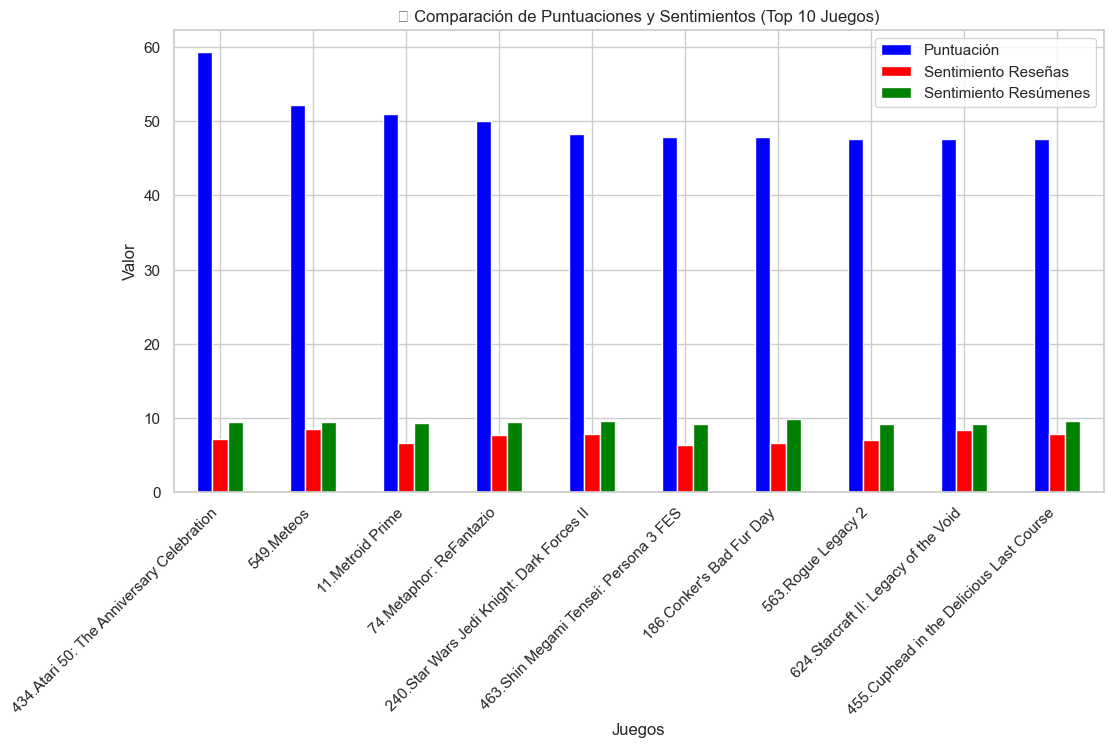


📢 Conclusión del Gráfico:
- Si las tres barras están alineadas, significa que la puntuación del juego y los sentimientos en reseñas y resúmenes son similares.
- Si la barra azul (puntuación) es más alta que las rojas y verdes, indica que el juego tiene una buena calificación, pero los jugadores expresan sentimientos más negativos en las reseñas o resúmenes.
- Si las barras de sentimiento son más altas que la puntuación, sugiere que, aunque el juego tiene una puntuación baja, los jugadores lo describen con un sentimiento más positivo.
- Juegos con diferencias marcadas entre puntuaciones y sentimientos pueden ser controversiales, polarizando la opinión de los jugadores.

✅ Tiempo total de ejecución para el análisis: 0.1389 segundos


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time  # Para medir el tiempo de ejecución

# 📌 Iniciar el cronómetro
start_time = time.time()

# 📌 Cargar el dataset
average_scores = pd.read_csv("merged_average_scores.csv")

# 📌 Asegurar que no haya valores NaN en los scores
average_scores['Average_Score'] = average_scores['Average_Score'].fillna(0)
average_scores['Average_Sentiment_Score'] = average_scores['Average_Sentiment_Score'].fillna(0)
average_scores['Summary_Sentiment_Score'] = average_scores['Summary_Sentiment_Score'].fillna(0)

# 📊 Mostrar estadísticas básicas
total_games = len(average_scores)
print(f"📌 Total de juegos analizados: {total_games}")

# 🎨 Configuración de visualización
sns.set_theme(style="whitegrid")

# 📌 **Gráfico de Barras Comparativo**
plt.figure(figsize=(12, 6))
average_scores_sorted = average_scores.sort_values(by="Average_Score", ascending=False).head(10)  # Top 10 juegos mejor puntuados

ax = average_scores_sorted.plot(
    x="Game", 
    y=["Average_Score", "Average_Sentiment_Score", "Summary_Sentiment_Score"], 
    kind="bar", figsize=(12, 6),
    color=["blue", "red", "green"]
)

plt.xlabel("Juegos")
plt.ylabel("Valor")
plt.title("📊 Comparación de Puntuaciones y Sentimientos (Top 10 Juegos)")
plt.xticks(rotation=45, ha="right")
plt.legend(["Puntuación", "Sentimiento Reseñas", "Sentimiento Resúmenes"])
plt.show()

# 📢 **Conclusión del Gráfico**
print("\n📢 Conclusión del Gráfico:")
print("- Si las tres barras están alineadas, significa que la puntuación del juego y los sentimientos en reseñas y resúmenes son similares.")
print("- Si la barra azul (puntuación) es más alta que las rojas y verdes, indica que el juego tiene una buena calificación, pero los jugadores expresan sentimientos más negativos en las reseñas o resúmenes.")
print("- Si las barras de sentimiento son más altas que la puntuación, sugiere que, aunque el juego tiene una puntuación baja, los jugadores lo describen con un sentimiento más positivo.")
print("- Juegos con diferencias marcadas entre puntuaciones y sentimientos pueden ser controversiales, polarizando la opinión de los jugadores.")

# ⏳ Detener el cronómetro y calcular el tiempo de ejecución
end_time = time.time()
execution_time = end_time - start_time
print(f"\n✅ Tiempo total de ejecución para el análisis: {execution_time:.4f} segundos")

---

## 15. Ranking de Juegos según Sentimiento Promedio

Para evaluar cuáles videojuegos han sido mejor percibidos por los jugadores, se ordenaron los juegos en función de su sentimiento promedio en las reseñas individuales (Average_Sentiment_Score). Esto permite identificar cuáles títulos han generado una respuesta más positiva dentro de la comunidad de jugadores.

**Proceso de Análisis**

1. Se ordenaron los videojuegos de mayor a menor según el sentimiento promedio en las reseñas.
2. Se generó un archivo sorted_games_by_sentiment.csv con la lista completa de juegos ordenados según su percepción positiva.
3. Se mostraron los 10 juegos con mejor Sentimiento Promedio, permitiendo analizar cuáles títulos han sido los más valorados por los jugadores en términos de emociones expresadas en sus reseñas.

**Interpretación de Resultados**

- Los juegos en las primeras posiciones del ranking son aquellos que han recibido las reseñas más positivas en términos de emoción y percepción general.
- Un sentimiento promedio alto indica que la mayoría de las reseñas expresaron una experiencia positiva con el juego, destacando aspectos como jugabilidad, historia, mecánicas y satisfacción general.
- Este análisis es útil para detectar títulos altamente recomendados por la comunidad, independientemente de su puntuación en Metacritic.

Los resultados obtenidos pueden ser de gran valor para entender la percepción de los jugadores y comparar si estos juegos también tienen una alta puntuación crítica o si existen diferencias entre la evaluación de los críticos y la experiencia de los usuarios.

In [28]:
# Ordenar juegos según Sentimiento Promedio
sorted_games = average_scores.sort_values(by='Average_Sentiment_Score', ascending=False)

# Guardar los resultados
sorted_csv_filename = "sorted_games_by_sentiment.csv"
sorted_games.to_csv(sorted_csv_filename, index=False)

# Mostrar los primeros 10 juegos con mejor sentimiento promedio
print("\n📌 Top 10 juegos con mejor Sentimiento Promedio:")
print(sorted_games[['Game', 'Average_Sentiment_Score']].head(10))


📌 Top 10 juegos con mejor Sentimiento Promedio:
                                                   Game  \
942                                     982.Daytona USA   
1041                          1,085.Closer the Distance   
769                          801.The Making of Karateka   
811               844.LostWinds: Winter of the Melodias   
913          951.Galactic Civilizations II: Dread Lords   
822   855.Enemy Engaged: RAH-66 Comanche Versus Ka-5...   
1051  1,095.Sam & Max Episode 205: What's New, Beelz...   
442                                       460.Descent 3   
882                    919.Pinball FX 2: Marvel Pinball   
591                                    617.ESPN NHL 2K5   

      Average_Sentiment_Score  
942                  9.981500  
1041                 9.980000  
769                  9.952333  
811                  9.899500  
913                  9.880000  
822                  9.859500  
1051                 9.854000  
442                  9.851749  
882          

## Conclusión Final

Este análisis nos permite comprender mejor la relación entre la evaluación crítica y la percepción de los jugadores. En casos donde hay discrepancias significativas, podemos inferir que la experiencia de juego puede diferir de la expectativa generada por los críticos, lo que puede deberse a múltiples factores, como bugs, cambios en la jugabilidad, o la subjetividad de la comunidad de jugadores.


Los resultados obtenidos pueden ser útiles para desarrolladores y analistas, permitiéndoles comprender mejor cómo sus juegos son percibidos por el público y qué factores pueden influir en su recepción.